### [Artificial Data Generators](https://scikit-learn.org/stable/datasets/sample_generators.html)

In [6]:
from sklearn.datasets import *

### For Classification

- [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs) - generate isotropic Gaussian blobs.


In [70]:
X,y = make_blobs(n_samples=1000,
                 n_features=3,
                 centers=None,
                 cluster_std=1.0,)
print(X.shape)
print(y.shape)
print(X[0])

(1000, 3)
(1000,)
[-1.87983687 -9.29421918 -7.51118103]


### [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification) 

- Generates random n-class data.
- Initially creates normally distributed clusters about the vertices of an `n_informative`-dimensional hypercube with sides of length=`2*class_sep`.
- Assigns equal number of clusters to each class.
- Insert interdependence between features and adds further noise.

In [72]:
X,y = make_classification(n_samples=100,
                          n_features=20,
                          n_informative=2,
                          n_redundant=2,
                          n_repeated=0,
                          n_classes=2,
                          n_clusters_per_class=2,
                          weights=None,
                          flip_y=0.01,
                          class_sep=1.0,
                          hypercube=True,
                          shift=0.0,
                          scale=1.0,
                          shuffle=True,
                          random_state=None)
print(X.shape)
print(y.shape)
print(X[0])

(100, 20)
(100,)
[-0.5327797  -1.01850853  1.96627731 -1.37423585  0.28955284  0.60498103
 -0.87262662 -1.2460967  -2.27388135 -0.67759805 -0.49377949  0.27307644
  0.31466699 -1.40146697 -0.6476324   1.52066461  2.1903122   0.92581289
 -1.04340091  0.00964815]


### [Make Gaussian Quantiles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_gaussian_quantiles.html#sklearn.datasets.make_gaussian_quantiles)

- Divides a single Gaussian cluster into near-equal sizes, separated by concentric hyperspheres.
- Built by taking a multi-dimensional standard normal distribution and defining classes separated by nested concentric multi-dimensional spheres such that roughly equal numbers of samples are in each class (quantiles of the distribution).

In [73]:
X,y = make_gaussian_quantiles(mean=None, 
                              cov=1.0, 
                              n_samples=100, 
                              n_features=2, 
                              n_classes=3, 
                              shuffle=True, 
                              random_state=None)
print(X.shape)
print(y.shape)
print(X[0])

(100, 2)
(100,)
[-0.58473374 -0.76341671]


### [Make Circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles)

- Builds a 2D binary classification dataset - Gaussian data, spherical decision boundary.

In [75]:
X,y = make_circles(n_samples=100,
                   shuffle=True, 
                   noise=None, 
                   random_state=None, 
                   factor=0.8)
print(X.shape)
print(y.shape)
print(X[0])

(100, 2)
(100,)
[-0.96858316  0.24868989]


### [Make Moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons)

- Builds a 2D binary classification dataset - two interleaving half circles.

In [76]:
X,y = make_moons(n_samples=100,
                 shuffle=True, 
                 noise=None, 
                 random_state=None)
print(X.shape)
print(y.shape)
print(X[0])

(100, 2)
(100,)
[ 0.23855404 -0.1482284 ]


### [Make Multilabel Classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_multilabel_classification.html#sklearn.datasets.make_multilabel_classification)

- Generates random samples with labels reflecting a bag of words drawn from a topic mixture. Topics for each document are drawn using a Poisson curve; topics themselves drawn from fixed random distribution.

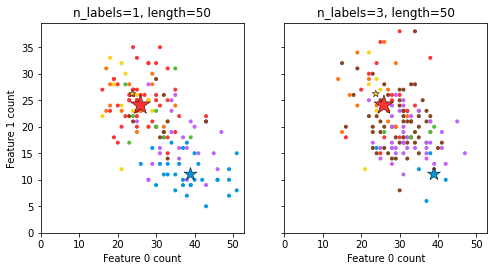

Class	P(C)	P(w0|C)	P(w1|C)
red	0.52	0.52	0.48
blue	0.33	0.78	0.22
yellow	0.15	0.48	0.52


In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_multilabel_classification as make_ml_clf

COLORS = np.array(['!',
                   '#FF3333',  # red
                   '#0198E1',  # blue
                   '#BF5FFF',  # purple
                   '#FCD116',  # yellow
                   '#FF7216',  # orange
                   '#4DBD33',  # green
                   '#87421F'   # brown
                   ])

# Use same random seed for multiple calls to make_multilabel_classification to
# ensure same distributions
RANDOM_SEED = np.random.randint(2 ** 10)

def plot_2d(ax, n_labels=1, n_classes=3, length=50):
    X, Y, p_c, p_w_c = make_ml_clf(n_samples=150, 
                                   n_features=2,
                                   n_classes=n_classes, 
                                   n_labels=n_labels,
                                   length=length, 
                                   allow_unlabeled=False,
                                   return_distributions=True,
                                   random_state=RANDOM_SEED)

    ax.scatter(X[:, 0], X[:, 1], 
               color=COLORS.take((Y * [1, 2, 4]).sum(axis=1)),
               marker='.')
    ax.scatter(p_w_c[0] * length, 
               p_w_c[1] * length,
               marker='*', linewidth=.5, edgecolor='black',
               s=20 + 1500 * p_c ** 2,
               color=COLORS.take([1, 2, 4]))
    ax.set_xlabel('Feature 0 count')
    return p_c, p_w_c


_, (ax1, ax2) = plt.subplots(1, 2, 
                             sharex='row', 
                             sharey='row', 
                             figsize=(8, 4))
plt.subplots_adjust(bottom=.15)

p_c, p_w_c = plot_2d(ax1, n_labels=1)
ax1.set_title('n_labels=1, length=50')
ax1.set_ylabel('Feature 1 count')

plot_2d(ax2, n_labels=3)
ax2.set_title('n_labels=3, length=50')
ax2.set_xlim(left=0, auto=True)
ax2.set_ylim(bottom=0, auto=True)
plt.show()
print('Class', 'P(C)', 'P(w0|C)', 'P(w1|C)', sep='\t')
for k, p, p_w in zip(['red', 'blue', 'yellow'], p_c, p_w_c.T):
    print('%s\t%0.2f\t%0.2f\t%0.2f' % (k, p, p_w[0], p_w[1]))

### [Make Hastie classification data](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_hastie_10_2.html#sklearn.datasets.make_hastie_10_2)

- The ten features are standard independent Gaussians.
- y[i] = 1 if np.sum(X[i] ** 2) > 9.34 else -1

In [74]:
X,y = make_hastie_10_2(n_samples=12000,
                       random_state=None)
print(X.shape)
print(y.shape)
print(X[0])

(12000, 10)
(12000,)
[ 2.00021898  0.52680462  1.26255452  0.39019033 -1.53801338  0.85746915
  0.50570651 -1.51914679  0.76832722  0.15300295]


### [Make BiClusters](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_biclusters.html#sklearn.datasets.make_biclusters)

- Creates an array with a constant block diagonal structure.

In [66]:
data,rows,cols = make_biclusters(shape=(300,300),n_clusters=4,noise=10)
print(data.shape)
print(rows.shape)
print(cols.shape)
print(data[0][0])

(300, 300)
(4, 300)
(4, 300)
-10.249833164684132


### [Make Checkerboard](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_checkerboard.html#sklearn.datasets.make_checkerboard)

- Creates an array with block checkerboard structures.

In [68]:
data,rows,cols = make_checkerboard(shape=(300,300),n_clusters=4,noise=10)
print(data.shape)
print(rows.shape)
print(cols.shape)
print(data[0][0])

(300, 300)
(16, 300)
(16, 300)
23.496944362976997


### Articicial Data for Regressions

### [Make Regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression)

- Produces regression targets as a random linear combination of features - with noise. Optionally sparse.

In [53]:
X,y = make_regression()
print(X.shape,y.shape,X[0])

(100, 100) (100,) [ 0.06698029 -0.3069998   0.77184325 -0.39840182 -0.00452168 -0.11195994
 -0.14763287  0.27955819  1.02062972 -0.81439297 -0.48074648  0.23396582
  0.48454019 -1.77366754  0.37189498 -0.53646237 -0.84980731  1.39237433
  0.25815746  1.63455151 -1.17181136  0.33051073  1.1862697   0.73710681
 -0.31791374  0.49778753  0.27869739  1.89215448  0.04803009 -0.12867303
  0.21967041 -0.28971271 -0.54499742  0.79278887  0.90996164 -1.04256368
  0.25586554  0.7123686   1.07949337  0.59558288  0.14479018  1.42451383
  0.27289982 -0.66993241 -0.38717179 -0.36648667 -0.19179518 -0.28000574
  0.34400883 -0.16284098  0.67861264 -1.550955    0.33024865 -0.16968446
 -0.49826749 -1.8160245  -2.75791505 -0.32876184 -0.13179621 -1.89203641
 -0.57492444  1.54479834 -0.38214558 -0.04896023 -0.23173704 -0.71714912
 -0.71399436 -0.01003642 -0.50113651 -1.34137456  1.75291892 -1.01586596
 -0.83445588 -0.62066657 -0.35601039  1.40640581 -0.31349628  1.30424865
  0.545493   -0.16099864  0.15380

### [Make Sparse Uncorrelated](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_sparse_uncorrelated.html#sklearn.datasets.make_sparse_uncorrelated)

- Returns a random regression with sparse data. Only the first 4 features are informative; the rest are useless.

In [54]:
X,y = make_sparse_uncorrelated(n_samples=100,n_features=10,random_state=None)
print(X.shape)
print(y.shape)
print(X[0])

(100, 10)
(100,)
[-0.5689727   0.5576709  -1.70289727  1.02627569  0.4254925  -0.71641036
 -1.54054783  0.54404947 -1.63913706  0.82025732]


### [Make Friedman1](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_friedman1.html#sklearn.datasets.make_friedman1)

- Generate a non-linear regression with polynomial & sine transform components. X are independent features uniformly distributed on [0,1]. `n_features` must be >=5; they are used to compute $y$. All other features are independent.
- $y(X) = 10 * sin(pi * X[:, 0] * X[:, 1]) + 20 * (X[:, 2] - 0.5) ** 2 + 10 * X[:, 3] + 5 * X[:, 4] + noise * N(0, 1).$

In [55]:
X,y = make_friedman1(n_samples=100,n_features=10,noise=1.0,random_state=None)
print(X.shape)
print(y.shape)

(100, 10)
(100,)
[0.11953237 0.11602222 0.59883894 0.30855094 0.39853371 0.10051568
 0.02995793 0.3369666  0.91208936 0.34997684]


### [Make Friedman2](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_friedman2.html#sklearn.datasets.make_friedman2)

- Includes feature multiplication & reciprocation.
- $y(X) = (X[:, 0] ** 2 + (X[:, 1] * X[:, 2]  - 1 / (X[:, 1] * X[:, 3])) ** 2) ** 0.5 + noise * N(0, 1).$

In [57]:
X,y = make_friedman2(n_samples=100,noise=1.0,random_state=None)
print(X.shape)
print(y.shape)
print(X[0])

(100, 4)
(100,)
[ 52.3916144  158.46614298   0.80609179   4.1962008 ]


### [Make Friedman3](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_friedman3.html#sklearn.datasets.make_friedman3)

- $y(X) = arctan((X[:, 1] * X[:, 2] - 1 / (X[:, 1] * X[:, 3])) / X[:, 0]) + noise * N(0, 1).$

In [58]:
X,y = make_friedman3(n_samples=100,noise=1.0,random_state=None)
print(X.shape)
print(y.shape)
print(X[0])

(100, 4)
(100,)
[2.50694239e-01 5.90670345e+02 4.34260321e-01 4.41140228e+00]


### Artificial Data for Manifold Learning

### [Make S Curve](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_s_curve.html#sklearn.datasets.make_s_curve)

- Returns X (ndarray of (#samples,3)) - the points
- Returns t (ndarray of (#samples) - sample univariate position according to the main dimension of the points.

In [48]:
n_samples = 300
X, color = make_s_curve(n_samples, random_state=0)
print(X.shape)
print(color.shape)
print(X[0])

(300, 3)
(300,)
[ 0.44399868  1.813111   -0.10397256]


### [Make Swiss Roll](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_swiss_roll.html#sklearn.datasets.make_swiss_roll)

- Generates a swiss roll dataset.

Elapsed time: 0.04s
Number of points: 1500


Text(0.5, 0.92, 'Without connectivity constraints (time 0.04s)')

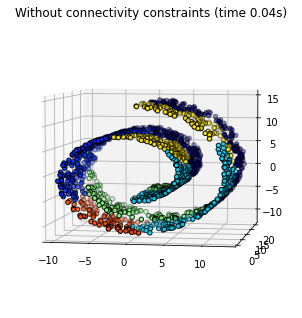

In [30]:
import time as time
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_swiss_roll

# Generate data (swiss roll dataset)
n_samples = 1500
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise=noise)

st = time.time()
ward = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print("Elapsed time: %.2fs" % elapsed_time)
print("Number of points: %i" % label.size)

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(5, -80)
for l in np.unique(label):
    ax.scatter(X[label == l, 0], X[label == l, 1], X[label == l, 2],
               color=plt.cm.jet(float(l) / np.max(label + 1)),
               s=20, edgecolor='k')
plt.title('Without connectivity constraints (time %.2fs)' % elapsed_time)


### Artificial Data for Decomposition

### [Make Low Rank Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_low_rank_matrix.html#sklearn.datasets.make_low_rank_matrix)

- Generates a mostly low-rank matrix with bell-shaped singular values.
- Most variance is explained by bell curve of width=`effective_rank`.
- The low rank portion of the profile is `(1-tail_strength)*exp(-1*(i/effective_rank**2)
- The remaining singular values' tail is `(tail_strength*exp(-0.1*i/effective_rank)
- The low-rank portion of the profile can be considered as *the structured signal*; the tail can be considered as *noise that cannot be summarized by a low number of linear components (singular vectors).*

In [21]:
lrk = make_low_rank_matrix(n_samples=100,
                           n_features=100,
                           effective_rank=10,
                           tail_strength=0.5)
print(lrk.shape)
print(lrk[0])

(100, 100)
[ 0.0207483   0.03501036 -0.00856394 -0.03304713  0.02422049 -0.08447866
  0.07067516  0.00195111 -0.06061771 -0.0328515  -0.05058193  0.05441509
 -0.01513637 -0.07151672  0.02211374  0.03362668 -0.03215901  0.01900238
  0.05239907 -0.03715071  0.00914405  0.04847495  0.01704945  0.02272577
 -0.01728876  0.00374982  0.05452294  0.10642534  0.00672532  0.0028429
 -0.04990748 -0.01137204  0.01445119 -0.02010115  0.00411994  0.02091189
  0.02687863  0.03879583  0.00268839  0.03630239 -0.00067613 -0.05864395
  0.00969729 -0.01315535 -0.08337604 -0.04757325  0.03523235  0.01164664
 -0.05115489  0.08647967 -0.05327722  0.04124141  0.06201153  0.02423658
  0.07593028 -0.0416375  -0.05806363 -0.04389909  0.00039963 -0.14444858
 -0.05349984  0.03157383  0.02038888  0.03179683 -0.00821888 -0.00894884
 -0.05833372 -0.04839682  0.00062753  0.06174672 -0.00091891  0.02645161
 -0.02940304  0.01017052  0.00453113  0.03049115 -0.02831156 -0.04490741
 -0.05726777  0.00151238 -0.0234058   0.0

### [Make Sparse Coded Signal](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_sparse_coded_signal.html#sklearn.datasets.make_sparse_coded_signal)

- Generates a matrix Y=DX 
- Y (the encoded signal): an ndarray of (#features,#samples)
- D (the dictionary with normalized components): an ndarray of (#features,#components)
- X (the sparse code - each column has `n_nonzero_coefs` non-zero items): an ndarray of (#components, #samples)

In [18]:
y,X,w = make_sparse_coded_signal(n_samples=1,
                                 n_components=512,
                                 n_features=100,
                                 n_nonzero_coefs=17)
print(y.shape)
print(X.shape)
print(w.shape)
print(X[0])

(100,)
(100, 512)
(512,)
[-1.12152746e-01 -1.74929245e-01 -4.00342334e-02  1.24385444e-01
 -8.58424988e-02 -5.41659927e-02 -8.76383585e-02  6.00833930e-02
 -4.64703055e-02 -2.48177145e-01  7.72228058e-03 -2.65302986e-02
 -1.92818736e-02 -3.56764063e-03  5.74511332e-02  3.47340777e-02
  3.09894753e-01 -1.47185558e-02  3.35152689e-02  4.90456041e-02
  1.28029945e-01  1.17135017e-01 -6.34805537e-02  1.20282051e-02
  3.69300807e-02  8.94991004e-02 -2.70678085e-02  6.19030831e-03
  1.68784595e-01  1.25873331e-02  4.54946404e-02  1.11516911e-01
 -3.44366616e-03 -6.09946106e-02 -4.61716024e-02  9.48933418e-02
  1.64168667e-02 -1.61083798e-01 -5.56038920e-02 -1.16258559e-01
 -1.38461026e-01 -1.09938779e-01 -7.85862413e-02  1.58726207e-01
 -1.89823371e-02  5.90689571e-02 -1.81219473e-01  4.46449151e-02
  5.71000374e-03 -1.66942459e-02 -5.30087870e-03 -1.25971283e-01
 -1.28098834e-01 -4.98534533e-02 -1.12140671e-01  1.34747222e-01
  1.03493001e-01 -8.73990484e-02 -3.17798049e-01  2.62266914e-02


### [Make Symmetric Positive Definite (SPD) Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_spd_matrix.html#sklearn.datasets.make_spd_matrix)

- [What is a symmetric positive definite matrix? (Nick Higham)](https://nhigham.com/2020/07/21/what-is-a-symmetric-positive-definite-matrix/)

In [8]:
spd2x2 = make_spd_matrix(2)
spd3x3 = make_spd_matrix(3)
print(spd2x2,"\n",spd3x3)

[[2.4129143  0.12343756]
 [0.12343756 0.40660248]] 
 [[ 3.40474192 -0.70747451  0.32173119]
 [-0.70747451  0.63463772 -0.10783239]
 [ 0.32173119 -0.10783239  0.77290192]]


### [Make Sparse SPD Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_sparse_spd_matrix.html#sklearn.datasets.make_sparse_spd_matrix)

- Params: dim (size); alpha (probability of a coefficient being zero); norm_diag (whether to normalize outputs to make leading diagonal elements to all = 1); smallest_coef (0..1); largest_coef (0..1), random_state)

### [Example: SPD inverse covariance estimates](https://scikit-learn.org/stable/auto_examples/covariance/plot_sparse_cov.html#sphx-glr-auto-examples-covariance-plot-sparse-cov-py)

- Use `Graphical Lasso` to learn covariance & sparse precision from a small #samples

- To estimate a probabilistic (eg, Gaussian) model, estimating the precision (inverse covariance) matrix is as important as estimating the covariance matrix. Indeed *a Gaussian model is parametrized by the precision matrix*.

- To be in favorable recovery conditions, we sample the data from a model with a sparse inverse covariance matrix. In addition, we ensure that the data is not too much correlated (limiting the largest coefficient of the precision matrix) and that there a no small coefficients in the precision matrix that cannot be recovered. 

- The #samples is slightly larger than #dimensions - thus empirical covariance is still invertible. However, the observations are strongly correlated - so the empirical covariance matrix is ill-conditioned. As a result its inverse –the empirical precision matrix– is very far from the ground truth.

- If we use l2 shrinkage, as with the Ledoit-Wolf estimator, as the number of samples is small, we need to shrink a lot. As a result, the Ledoit-Wolf precision is fairly close to the ground truth precision, that is not far from being diagonal, but the off-diagonal structure is lost.

- The *l1-penalized estimator* can recover part of this off-diagonal structure. It learns a sparse precision. It cannot recover the exact sparsity pattern: it detects too many non-zero coefficients. However, the highest non-zero coefficients of the l1 estimated correspond to the non-zero coefficients in the ground truth. 

- The coefficients of the l1 precision estimate are biased toward zero: because of the penalty, they are all smaller than the corresponding ground truth value, as can be seen on the figure.

- The color range of the precision matrices is tweaked to improve readability of the figure. The full range of values of the empirical precision is not displayed.

- GraphicalLasso `alpha` (sparsity) param is set by internal cross-validation.

In [1]:
import numpy as np
from scipy import linalg
from sklearn.datasets import make_sparse_spd_matrix
from sklearn.covariance import GraphicalLassoCV, ledoit_wolf
import matplotlib.pyplot as plt

In [2]:
n_samples, n_features = 60,20

prng = np.random.RandomState(1)
prec = make_sparse_spd_matrix(n_features, alpha=.98,
                              smallest_coef=.4,
                              largest_coef=.7,
                              random_state=prng)
cov   = linalg.inv(prec)
d     = np.sqrt(np.diag(cov))
cov  /= d
cov  /= d[:, np.newaxis]
prec *= d
prec *= d[:, np.newaxis]
X     = prng.multivariate_normal(np.zeros(n_features), cov, size=n_samples)
X    -= X.mean(axis=0)
X    /= X.std(axis=0)

In [3]:
# Estimate the covariance

emp_cov    = np.dot(X.T, X) / n_samples
model      = GraphicalLassoCV().fit(X)
cov_       = model.covariance_
prec_      = model.precision_
lw_cov_, _ = ledoit_wolf(X)
lw_prec_   = linalg.inv(lw_cov_)

Text(0.5, 0, 'alpha')

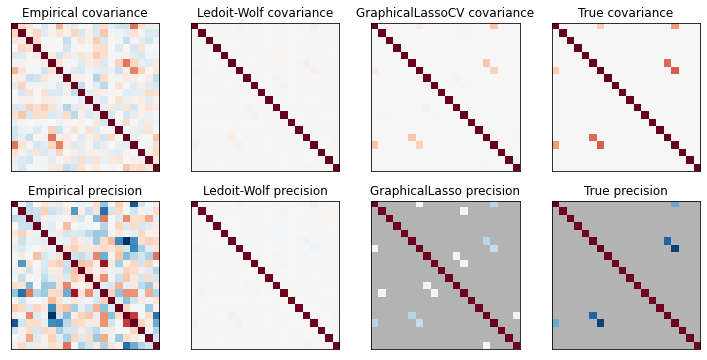

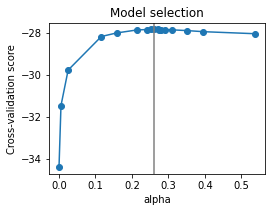

In [4]:
plt.figure(figsize=(10, 6))
plt.subplots_adjust(left=0.02, right=0.98)

# plot the covariances
covs = [('Empirical', emp_cov), 
        ('Ledoit-Wolf', lw_cov_),
        ('GraphicalLassoCV', cov_), 
        ('True', cov)]

vmax = cov_.max()
for i, (name, this_cov) in enumerate(covs):
    plt.subplot(2, 4, i + 1)
    plt.imshow(this_cov, interpolation='nearest', vmin=-vmax, vmax=vmax,
               cmap=plt.cm.RdBu_r)
    plt.xticks(())
    plt.yticks(())
    plt.title('%s covariance' % name)

# plot the precisions
precs = [('Empirical', linalg.inv(emp_cov)), 
         ('Ledoit-Wolf', lw_prec_),
         ('GraphicalLasso', prec_), 
         ('True', prec)]

vmax = .9 * prec_.max()
for i, (name, this_prec) in enumerate(precs):
    ax = plt.subplot(2, 4, i + 5)
    plt.imshow(np.ma.masked_equal(this_prec, 0),
               interpolation='nearest', vmin=-vmax, vmax=vmax,
               cmap=plt.cm.RdBu_r)
    plt.xticks(())
    plt.yticks(())
    plt.title('%s precision' % name)
    if hasattr(ax, 'set_facecolor'):
        ax.set_facecolor('.7')
    else:
        ax.set_axis_bgcolor('.7')

# plot the model selection metric
plt.figure(figsize=(4, 3))
plt.axes([.2, .15, .75, .7])
plt.plot(model.cv_results_["alphas"], model.cv_results_["mean_score"], 'o-')
plt.axvline(model.alpha_, color='.5')
plt.title('Model selection')
plt.ylabel('Cross-validation score')
plt.xlabel('alpha')